In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from math import sqrt
from numpy import mean
from scipy.stats import t

def independent_ttest_1(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # Sample size
    n1, n2 = len(data1), len(data2)
    df = n1 + n2 - 2
    # calculate standard errors
    se_p_2 = (sum((data1 - mean1)**2.0) + sum((data2 - mean2)**2.0))/df
    # standard error on the difference between the samples
    sed = sqrt(se_p_2)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / (sed*sqrt(1/n1 + 1/n2))
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) 
    # return everything
    return t_stat, df, cv, p

def independent_ttest_2(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # Sample size
    n1, n2 = len(data1), len(data2)
    df = n1 + n2 - 2
    # calculate standard errors
    se_p_2 = (sum((data1 - mean1)**2.0) + sum((data2 - mean2)**2.0))/df
    # standard error on the difference between the samples
    sed = sqrt(se_p_2)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / (sed*sqrt(1/n1 + 1/n2))
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return {'t statistics': t_stat, 'degree of freedom': df, 'p-value': p}

In [3]:
sacog = pd.read_excel('sacog_recoded_012021.xlsx')

In [4]:
list(sacog.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'Duration (in seconds)',
 'Response ID',
 'May-WorkingHours',
 'May-TelecommutingDays',
 'May-Trips-Commuting',
 'May-Trips-Medical',
 'May-Trips-Gym',
 'May-Trips-ToSchool',
 'May-Trips-FromSchool',
 'May-Trips-Bar',
 'May-Trips-MovieTheater',
 'May-Trips-Friends',
 'May-Trips-Family',
 'May-Trips-Other',
 'May-Trips-OtherType',
 'CommutingFollowup',
 'May-TripDistance-Commuting',
 'May-TripDistance-Medical',
 'May-TripDistance-Gym',
 'May-TripDistance-ToSchool',
 'May-TripDistance-FromSchool',
 'May-TripDistance-Bar',
 'May-TripDistance-MovieTheater',
 'May-TripDistance-Friends',
 'May-TripDistance-Family',
 'May-TripDistance-Other',
 'May-TripDistance-OtherType',
 'May-TripMode-Commuting',
 'May-TripMode-Medical',
 'May-TripMode-Gym',
 'May-TripMode-ToSchool',
 'May-TripMode-FromSchool',
 'May-TripMode-Bar',
 'May-TripMode-MovieTheater',
 'May-TripMode-Friends',
 'May-TripMode-Family',
 'May-TripMode-Other',
 'May-TripMode-OtherType',
 'LivingInSameP

In [29]:
sacog[['May-InStore-Trips-PreparedFood','May-ECommerce-Orders-PreparedFood', 'May-InStore-Frequency-PreparedFood', 'May-ECommerce-Frequency-PreparedFood']].head()

,May-InStore-Trips-PreparedFood,May-ECommerce-Orders-PreparedFood,May-InStore-Frequency-PreparedFood,May-ECommerce-Frequency-PreparedFood
0,0,0,Less than 1 time per week,Less than 1 time per week
1,2,0,No Response,Almost never
2,0,0,Never,Never
3,4,2,No Response,No Response
4,2,2,No Response,No Response


In [30]:
MayNeverOnline = sacog[(sacog['May-ECommerce-Frequency-PreparedFood'].isin(["Never", "Almost never"])) & 
          (sacog['May-ECommerce-Frequency-Groceries'].isin(["Never", "Almost never"])) & 
          (sacog['May-ECommerce-Frequency-OtherFood'].isin(["Never", "Almost never"])) &
          (sacog['May-ECommerce-Frequency-PaperCleaning'].isin(["Never", "Almost never"])) &
          (sacog['May-ECommerce-Frequency-Clothing'].isin(["Never", "Almost never"])) &
          (sacog['May-ECommerce-Frequency-HomeOffice'].isin(["Never", "Almost never"])) &
          (sacog['May-ECommerce-Frequency-Medication'].isin(["Never", "Almost never"])) &
          (sacog['May-ECommerce-Frequency-ChildcareItems'].isin(["Never", "Almost never"])) &
          (sacog['May-ECommerce-Frequency-Other'].isin(["Never", "Almost never"]))]

In [31]:
PastNeverOnline = sacog[(sacog['PastYear-ECommerce-Frequency-PreparedFood'].isin(["Never", "Almost never"])) & 
          (sacog['PastYear-ECommerce-Frequency-Groceries'].isin(["Never", "Almost never"])) & 
          (sacog['PastYear-ECommerce-Frequency-OtherFood'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-PaperCleaning'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-Clothing'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-HomeOffice'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-Medication'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-ChildcareItems'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-Other'].isin(["Never", "Almost never"]))]

In [34]:
MayNeverOnline[['May-InStore-Trips-PreparedFood','May-ECommerce-Orders-PreparedFood', 'May-InStore-Frequency-PreparedFood', 'May-ECommerce-Frequency-PreparedFood']]

,May-InStore-Trips-PreparedFood,May-ECommerce-Orders-PreparedFood,May-InStore-Frequency-PreparedFood,May-ECommerce-Frequency-PreparedFood
2,0,0,Never,Never
158,4,0,No Response,Never
324,-9998,0,No Response,Never


In [33]:
PastNeverOnline

,Unnamed: 0,Unnamed: 0.1,Duration (in seconds),Response ID,May-WorkingHours,May-TelecommutingDays,May-Trips-Commuting,May-Trips-Medical,May-Trips-Gym,May-Trips-ToSchool,...,Past_Try_EGrocery,Past_Try_EOtherFood,Past_Try_EPaperCleaning,Past_Try_EClothing,Past_Try_EHomeOffice,Past_Try_EMedication,Past_Try_EChildcare,Past_Try_Eother,tried,Before Group
47,47,47,4524,R_2BhPhfsp7GvBkbe,"I did not work from Sunday, May 17th through S...",-1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Not Freq EUser
71,71,71,3650,R_sR9A5mrzg3dF4bf,"I did not work from Sunday, May 17th through S...",-1,-9998,1,-9998,-9998,...,0,0,0,0,0,0,0,0,0,Not Freq EUser
78,78,78,5476,R_1jKbqv3BacUO4Qj,"I did not work from Sunday, May 17th through S...",-1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Not Freq EUser
187,187,187,98349,R_296NfB6fR39lYdM,"I did not work from Sunday, May 17th through S...",-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Not Freq EUser
210,210,210,4119,R_22MqhKnZlmyXMD3,7am to 6pm,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Not Freq EUser
257,257,257,4098,R_2z7vBUg6DhTsRO2,9 am to 5 pm (or similar),5,-9998,-9998,-9998,-9998,...,0,0,0,0,0,0,0,0,0,Not Freq EUser
263,263,263,6743,R_2VNDilUmww1JQzE,9 am to 5 pm (or similar),3,2,0,0,0,...,0,0,0,0,0,0,0,0,0,Not Freq EUser
280,280,280,2834,R_2BrjvykZHwoF1jc,"I did not work from Sunday, May 17th through S...",5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Not Freq EUser
281,281,281,2760,R_2f6zWXzShiVq1PK,"I did not work from Sunday, May 17th through S...",-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Not Freq EUser


In [5]:
sacog[['May-ECommerce-Orders-PreparedFood', 'May-ECommerce-Frequency-PreparedFood', 'May-InStore-Frequency-PreparedFood']].head(5)

,May-ECommerce-Orders-PreparedFood,May-ECommerce-Frequency-PreparedFood,May-InStore-Frequency-PreparedFood
0,0,Less than 1 time per week,Less than 1 time per week
1,0,Almost never,No Response
2,0,Never,Never
3,2,No Response,No Response
4,2,No Response,No Response


In [ ]:
### Better way to encode level of frequency?

In [4]:
# Original coding
freq_dict = {'More than 5 times per week': 7, 
             '3 - 5 times per week': 6,
             '2 - 3 times per week': 5,
             'About 1 time per week': 4,
             'Less than 1 time per week ': 3,
             'Less than 1 time per month ': 2,
             'Never': 1,
             'Almost never': 1,
             'No Response': 0}

# Change to monthly frequency
#freq_dict = {'More than 5 times per week': 20, # 5*4
#             '3 - 5 times per week': 16, # 4*4
#             '2 - 3 times per week': 10, #2.5*4
#             'About 1 time per week': 4, #1*4
#             'Less than 1 time per week ': 2, # 1 time every two week
#             'Less than 1 time per month ': 0.5, # 1 time every two month
#             'Never': 0,
#             'Almost never': 0.1,
#             'No Response': 99}

In [5]:
sacog['Past_Freq_EPreparedFood'] = sacog['PastYear-ECommerce-Frequency-PreparedFood'].map(freq_dict)
sacog['Past_Freq_EGrocery'] = sacog['PastYear-ECommerce-Frequency-Groceries'].map(freq_dict)
sacog['Past_Freq_EOtherFood'] = sacog['PastYear-ECommerce-Frequency-OtherFood'].map(freq_dict)
sacog['Past_Freq_EPaperCleaning'] = sacog['PastYear-ECommerce-Frequency-PaperCleaning'].map(freq_dict)
sacog['Past_Freq_EClothing'] = sacog['PastYear-ECommerce-Frequency-Clothing'].map(freq_dict)
sacog['Past_Freq_EHomeOffice'] = sacog['PastYear-ECommerce-Frequency-HomeOffice'].map(freq_dict)
sacog['Past_Freq_EMedication'] = sacog['PastYear-ECommerce-Frequency-Medication'].map(freq_dict)
sacog['Past_Freq_EChildcare'] = sacog['PastYear-ECommerce-Frequency-ChildcareItems'].map(freq_dict)
sacog['Past_Freq_Eother'] = sacog['PastYear-ECommerce-Frequency-Other'].map(freq_dict)

In [6]:
sacog[['Past_Freq_EPreparedFood', 'Past_Freq_EGrocery', 'Past_Freq_EOtherFood', 'Past_Freq_EPaperCleaning', 
     'Past_Freq_EClothing', 'Past_Freq_EHomeOffice', 'Past_Freq_EMedication', 'Past_Freq_EChildcare', 'Past_Freq_Eother']].describe()

,Past_Freq_EPreparedFood,Past_Freq_EGrocery,Past_Freq_EOtherFood,Past_Freq_EPaperCleaning,Past_Freq_EClothing,Past_Freq_EHomeOffice,Past_Freq_EMedication,Past_Freq_EChildcare,Past_Freq_Eother
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,2.076453,1.559633,1.348624,1.418960,1.840979,1.388379,1.529052,1.125382,0.614679
std,1.501624,1.306646,1.006508,0.987036,1.110092,0.850254,0.993034,0.746894,0.986799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,7.000000,7.000000,5.000000,7.000000,7.000000,5.000000,5.000000,4.000000,5.000000


In [7]:
sacog['Past_Try_EPreparedFood'] = sacog['Past_Freq_EPreparedFood'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_EGrocery'] = sacog['Past_Freq_EGrocery'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_EOtherFood'] = sacog['Past_Freq_EOtherFood'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_EPaperCleaning'] = sacog['Past_Freq_EPaperCleaning'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_EClothing'] = sacog['Past_Freq_EClothing'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_EHomeOffice'] = sacog['Past_Freq_EHomeOffice'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_EMedication'] = sacog['Past_Freq_EMedication'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_EChildcare'] = sacog['Past_Freq_EChildcare'].apply(lambda x: 1 if x > 1 else 0)
sacog['Past_Try_Eother'] = sacog['Past_Freq_Eother'].apply(lambda x: 1 if x > 1 else 0)

In [8]:
sacog[['Past_Try_EPreparedFood', 'Past_Try_EGrocery', 'Past_Try_EOtherFood', 'Past_Try_EPaperCleaning', 
     'Past_Try_EClothing', 'Past_Try_EHomeOffice', 'Past_Try_EMedication', 'Past_Try_EChildcare', 'Past_Try_Eother']].describe()

,Past_Try_EPreparedFood,Past_Try_EGrocery,Past_Try_EOtherFood,Past_Try_EPaperCleaning,Past_Try_EClothing,Past_Try_EHomeOffice,Past_Try_EMedication,Past_Try_EChildcare,Past_Try_Eother
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,0.522936,0.293578,0.253823,0.366972,0.688073,0.425076,0.470948,0.195719,0.159021
std,0.500239,0.456099,0.435864,0.482718,0.463990,0.495112,0.499920,0.397361,0.366257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
sacog['tried'] = sacog[['Past_Try_EPreparedFood', 'Past_Try_EGrocery', 'Past_Try_EOtherFood', 'Past_Try_EPaperCleaning', 
     'Past_Try_EClothing', 'Past_Try_EHomeOffice', 'Past_Try_EMedication', 'Past_Try_EChildcare']].apply(np.sum, axis = 1)

In [10]:
sacog['tried'].describe()

count    327.000000
mean       3.217125
std        2.254909
min        0.000000
25%        1.500000
50%        3.000000
75%        5.000000
max        8.000000
Name: tried, dtype: float64

## 1. Online shopping style (by frequency)

### 1.1 Feb/2019 - Feb/2020 shopping style

In [11]:
X = sacog[['tried', 'Past_Freq_EPreparedFood', 'Past_Freq_EGrocery', 'Past_Freq_EOtherFood', 'Past_Freq_EPaperCleaning', 
     'Past_Freq_EClothing', 'Past_Freq_EHomeOffice', 'Past_Freq_EMedication', 'Past_Freq_EChildcare', 'Past_Try_EPreparedFood', 'Past_Try_EGrocery', 'Past_Try_EOtherFood', 'Past_Try_EPaperCleaning', 
     'Past_Try_EClothing', 'Past_Try_EHomeOffice', 'Past_Try_EMedication', 'Past_Try_EChildcare']]

In [12]:
# Exclude those records with at least one 'no response' (327 -> 276)
X = X[(X[['Past_Freq_EPreparedFood', 'Past_Freq_EGrocery', 'Past_Freq_EOtherFood', 'Past_Freq_EPaperCleaning', 
     'Past_Freq_EClothing', 'Past_Freq_EHomeOffice', 'Past_Freq_EMedication', 'Past_Freq_EChildcare']] != 0).all(axis=1)]
X.describe()

,tried,Past_Freq_EPreparedFood,Past_Freq_EGrocery,Past_Freq_EOtherFood,Past_Freq_EPaperCleaning,Past_Freq_EClothing,Past_Freq_EHomeOffice,Past_Freq_EMedication,Past_Freq_EChildcare,Past_Try_EPreparedFood,Past_Try_EGrocery,Past_Try_EOtherFood,Past_Try_EPaperCleaning,Past_Try_EClothing,Past_Try_EHomeOffice,Past_Try_EMedication,Past_Try_EChildcare
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.00000,276.000000,276.000000,276.000000,276.000000
mean,3.612319,2.275362,1.728261,1.500000,1.612319,2.108696,1.590580,1.760870,1.307971,0.568841,0.322464,0.275362,0.40942,0.786232,0.481884,0.543478,0.224638
std,2.123049,1.392281,1.248446,0.924416,0.885270,0.939515,0.715378,0.840384,0.640518,0.496138,0.468268,0.447508,0.49262,0.410710,0.500579,0.499011,0.418102
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000
75%,5.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
max,8.000000,7.000000,7.000000,5.000000,7.000000,7.000000,5.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
X_ = X[['Past_Freq_EPreparedFood', 'Past_Freq_EGrocery', 'Past_Freq_EOtherFood', 'Past_Freq_EPaperCleaning', 
     'Past_Freq_EClothing', 'Past_Freq_EHomeOffice', 'Past_Freq_EMedication', 'Past_Freq_EChildcare']]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, n_init = 25, max_iter = 1000, random_state = 0)
    km = km.fit(X_)
    Sum_of_squared_distances.append(km.inertia_)

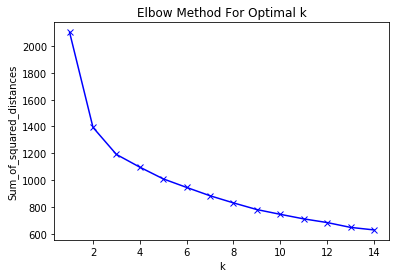

In [14]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### 'Past_Freq_EPreparedFood', 'Past_Freq_EGrocery', 'Past_Freq_EOtherFood', 'Past_Freq_EPaperCleaning', 'Past_Freq_EClothing', 'Past_Freq_EHomeOffice', 'Past_Freq_EMedication', 'Past_Freq_EChildcare', 'Past_Freq_Eother'

In [22]:
freq_dict = {'More than 5 times per week': 7, 
             '3 - 5 times per week': 6,
             '2 - 3 times per week': 5,
             'About 1 time per week': 4,
             'Less than 1 time per week ': 3,
             'Less than 1 time per month ': 2,
             'Never': 1,
             'Almost never': 1,
             'No Response': 0}

#### orange: Frequent ecommerce user. Do online purchase of all categories at a certain frequency with prepared food and grocery about 1 time per week.
#### blue: Do online shopping frequently, usually for prepared food ordering; also purchase clothing and medication from time to time.
#### green: Didn't do online shopping much. Use online platform occasionally for clothing and medication.

(array([0, 1, 2], dtype=int32), array([161,  57,  58]))

array([[1.27950311, 1.11801242, 1.22981366, 1.26708075, 1.96273292,
        1.49689441, 1.63975155, 1.23602484],
       [3.75438596, 3.9122807 , 2.36842105, 2.70175439, 2.50877193,
        1.98245614, 2.14035088, 1.59649123],
       [3.5862069 , 1.27586207, 1.39655172, 1.5       , 2.12068966,
        1.46551724, 1.72413793, 1.22413793]])

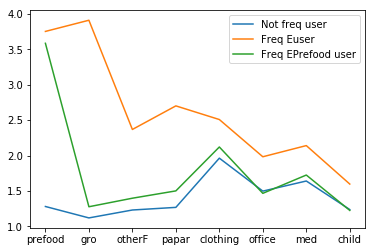

In [15]:
km3 = KMeans(n_clusters=3, n_init = 25, max_iter = 1000, random_state = 0)
km3 = km3.fit(X_)
display(np.unique(km3.labels_, return_counts=True))
display(km3.cluster_centers_)

x = ['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child']
labels = ['Not freq user', 'Freq Euser', 'Freq EPrefood user']
y = km3.cluster_centers_
for y_arr, label in zip(y, labels):
    plt.plot(x, y_arr, label=label)

plt.legend()
plt.show()

0    161
2     58
1     57
Name: class, dtype: int64

/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

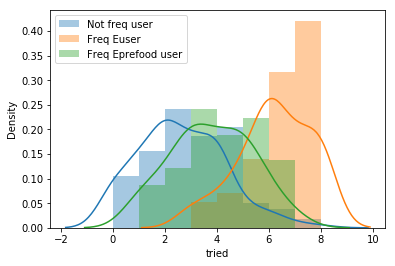

In [16]:
X['class'] = km3.labels_
display(X['class'].value_counts())
sns.distplot(X[X['class'] == 0]['tried'], label = 'Not freq user')
sns.distplot(X[X['class'] == 1]['tried'], label = 'Freq Euser')
sns.distplot(X[X['class'] == 2]['tried'], label = 'Freq Eprefood user')
plt.legend()

In [20]:
X[X['class'] == 1][['Past_Try_EPreparedFood', 'Past_Try_EGrocery', 'Past_Try_EOtherFood', 'Past_Try_EPaperCleaning', 
     'Past_Try_EClothing', 'Past_Try_EHomeOffice', 'Past_Try_EMedication', 'Past_Try_EChildcare']].apply(np.sum, axis = 0)

Past_Try_EPreparedFood     54
Past_Try_EGrocery          57
Past_Try_EOtherFood        37
Past_Try_EPaperCleaning    53
Past_Try_EClothing         54
Past_Try_EHomeOffice       38
Past_Try_EMedication       39
Past_Try_EChildcare        22
dtype: int64

#### The mean of number of categories tried for different group is significantly different. Though group 0 and 1 has similar online shopping frequency for categories other than prepared food, users of group 1 is more ecommerce penetrated in that they tried ecommerce for a more various kind of products.
### [Questions: who is more ecommerce penetrated?]

In [21]:
## The mean of number of categories tried for different group is significantly different
display(independent_ttest_2(X[X['class'] == 0]['tried'], X[X['class'] == 2]['tried'], 0.05))
display(independent_ttest_2(X[X['class'] == 2]['tried'], X[X['class'] == 1]['tried'], 0.05))

{'t statistics': -4.635675259600052,
 'degree of freedom': 217,
 'p-value': 6.139984069175597e-06}

{'t statistics': -8.696917335233644,
 'degree of freedom': 113,
 'p-value': 3.108624468950438e-14}

In [17]:
dict_km3 = {0: 'Not Freq EUser', 1: 'Freq EUser', 2: 'Efood User'}


In [18]:
sacog.loc[(sacog[['Past_Freq_EPreparedFood', 'Past_Freq_EGrocery', 'Past_Freq_EOtherFood', 'Past_Freq_EPaperCleaning', 
     'Past_Freq_EClothing', 'Past_Freq_EHomeOffice', 'Past_Freq_EMedication', 'Past_Freq_EChildcare']] != 0).all(axis=1), 'Before Group'] = list(map(dict_km3.get, km3.labels_))

#### Try with four groups

In [19]:
km4 = KMeans(n_clusters=4, n_init = 25, max_iter = 1000, random_state = 0)
km4 = km4.fit(X_)
display(np.unique(km4.labels_, return_counts=True))
display(km4.cluster_centers_)

(array([0, 1, 2, 3], dtype=int32), array([ 58,  46,  38, 134]))

array([[3.5862069 , 1.27586207, 1.39655172, 1.5       , 2.12068966,
        1.46551724, 1.72413793, 1.22413793],
       [4.17391304, 4.04347826, 2.52173913, 2.65217391, 2.36956522,
        1.86956522, 2.08695652, 1.45652174],
       [1.52631579, 2.02631579, 1.55263158, 2.26315789, 3.13157895,
        2.02631579, 1.94736842, 1.71052632],
       [1.26865672, 1.04477612, 1.17910448, 1.11940299, 1.7238806 ,
        1.42537313, 1.6119403 , 1.17910448]])

#### Classification with 4 clusters identified a new group with high Eclothing frequency

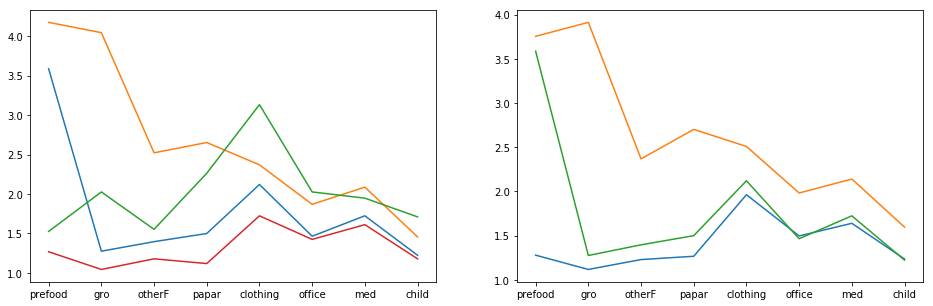

In [20]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], km4.cluster_centers_.T)
plt.subplot(1, 2, 2)
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], km3.cluster_centers_.T)

3    134
0     58
1     46
2     38
Name: class4, dtype: int64

/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

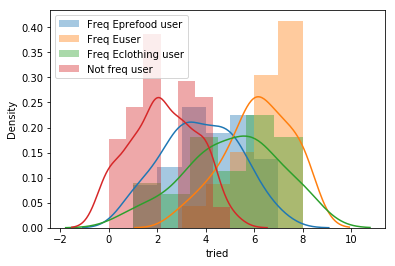

In [21]:
X['class4'] = km4.labels_
display(X['class4'].value_counts())
sns.distplot(X[X['class4'] == 0]['tried'], label = 'Freq Eprefood user')
sns.distplot(X[X['class4'] == 1]['tried'], label = 'Freq Euser')
sns.distplot(X[X['class4'] == 2]['tried'], label = 'Freq Eclothing user')
sns.distplot(X[X['class4'] == 3]['tried'], label = 'Not freq user')
plt.legend()

In [26]:
X[(X['class'] == 0) & (X['class4'] == 2)]['Past_Freq_EClothing']
X[(X['class'] == 1) & (X['class4'] == 2)]['Past_Freq_EClothing']
X.loc[118,]

tried                       3
Past_Freq_EPreparedFood     1
Past_Freq_EGrocery          4
Past_Freq_EOtherFood        1
Past_Freq_EPaperCleaning    4
Past_Freq_EClothing         1
Past_Freq_EHomeOffice       2
Past_Freq_EMedication       1
Past_Freq_EChildcare        1
Past_Try_EPreparedFood      0
Past_Try_EGrocery           1
Past_Try_EOtherFood         0
Past_Try_EPaperCleaning     1
Past_Try_EClothing          0
Past_Try_EHomeOffice        1
Past_Try_EMedication        0
Past_Try_EChildcare         0
class                       1
class4                      2
Name: 118, dtype: int64

In [22]:
pd.crosstab(X['class'], X['class4'])

class4,0,1,2,3
class,,,,
0,0,0,27,134
1,0,46,11,0
2,58,0,0,0


In [28]:
# Original groups
display(independent_ttest_2(X[X['class4'] == 0]['tried'], X[X['class4'] == 3]['tried'], 0.05))
display(independent_ttest_2(X[X['class4'] == 0]['tried'], X[X['class4'] == 1]['tried'], 0.05))

display(independent_ttest_2(X[X['class4'] == 0]['tried'], X[X['class4'] == 2]['tried'], 0.05)) #Ecloth v.s. Efood
display(independent_ttest_2(X[X['class4'] == 2]['tried'], X[X['class4'] == 1]['tried'], 0.05)) #Ecloth v.s. freq euser

{'t statistics': 6.901180136108397,
 'degree of freedom': 190,
 'p-value': 7.482214847698287e-11}

{'t statistics': -8.03692976303895,
 'degree of freedom': 102,
 'p-value': 1.6988632722814145e-12}

{'t statistics': -3.5937455446599382,
 'degree of freedom': 94,
 'p-value': 0.0005212694650331695}

{'t statistics': -2.970785549087896,
 'degree of freedom': 82,
 'p-value': 0.0038960253020070557}

### 1.2 May shopping behavior 

In [81]:
sacog['May_Freq_EPreparedFood'] = sacog['May-ECommerce-Frequency-PreparedFood'].map(freq_dict)
sacog['May_Freq_EGrocery'] = sacog['May-ECommerce-Frequency-Groceries'].map(freq_dict)
sacog['May_Freq_EOtherFood'] = sacog['May-ECommerce-Frequency-OtherFood'].map(freq_dict)
sacog['May_Freq_EPaperCleaning'] = sacog['May-ECommerce-Frequency-PaperCleaning'].map(freq_dict)
sacog['May_Freq_EClothing'] = sacog['May-ECommerce-Frequency-Clothing'].map(freq_dict)
sacog['May_Freq_EHomeOffice'] = sacog['May-ECommerce-Frequency-HomeOffice'].map(freq_dict)
sacog['May_Freq_EMedication'] = sacog['May-ECommerce-Frequency-Medication'].map(freq_dict)
sacog['May_Freq_EChildcare'] = sacog['May-ECommerce-Frequency-ChildcareItems'].map(freq_dict)
sacog['May_Freq_Eother'] = sacog['May-ECommerce-Frequency-Other'].map(freq_dict)

In [97]:
sacog['May_Freq_PreparedFood'] = sacog['May-InStore-Frequency-PreparedFood'].map(freq_dict)
sacog['May_Freq_Grocery'] = sacog['May-InStore-Frequency-Groceries'].map(freq_dict)
sacog['May_Freq_OtherFood'] = sacog['May-InStore-Frequency-OtherFood'].map(freq_dict)
sacog['May_Freq_PaperCleaning'] = sacog['May-InStore-Frequency-PaperCleaning'].map(freq_dict)
sacog['May_Freq_Clothing'] = sacog['May-InStore-Frequency-Clothing'].map(freq_dict)
sacog['May_Freq_HomeOffice'] = sacog['May-InStore-Frequency-HomeOffice'].map(freq_dict)
sacog['May_Freq_Medication'] = sacog['May-InStore-Frequency-Medication'].map(freq_dict)
sacog['May_Freq_Childcare'] = sacog['May-InStore-Frequency-ChildcareItems'].map(freq_dict)
sacog['May_Freq_other'] = sacog['May-InStore-Frequency-Other'].map(freq_dict)

#### Involves imputation of data

In [57]:
freq_dict = {'More than 5 times per week': 7, 
             '3 - 5 times per week': 6,
             '2 - 3 times per week': 5,
             'About 1 time per week': 4,
             'Less than 1 time per week ': 3,
             'Less than 1 time per month ': 2,
             'Never': 1,
             'Almost never': 1,
             'No Response': 0}

In [85]:
def freq_online(orders):
    if orders > 5:
        return 7
    elif orders > 3:
        return 6
    elif orders >= 2:
        return 5
    elif orders >= 1:
        return 4

In [59]:
def freq_instore(trips):
    if trips/2 > 5:
        return 7
    elif trips/2 > 3:
        return 6
    elif trips/2 >= 2:
        return 5
    elif trips/2 >= 1:
        return 4
    elif trips/2 < 1:
        return 3

In [93]:
sacog.loc[sacog['May-ECommerce-Orders-PreparedFood'] > 0, 'May_Freq_EPreparedFood'] = sacog.loc[sacog['May-ECommerce-Orders-PreparedFood'] > 0]['May-ECommerce-Orders-PreparedFood'].apply(freq_online)
sacog.loc[sacog['May-ECommerce-Orders-Groceries'] > 0, 'May_Freq_EGrocery'] = sacog.loc[sacog['May-ECommerce-Orders-Groceries'] > 0]['May-ECommerce-Orders-Groceries'].apply(freq_online)
sacog.loc[sacog['May-ECommerce-Orders-OtherFood'] > 0, 'May_Freq_EOtherFood'] = sacog.loc[sacog['May-ECommerce-Orders-OtherFood'] > 0]['May-ECommerce-Orders-OtherFood'].apply(freq_online)
sacog.loc[sacog['May-ECommerce-Orders-PaperCleaning'] > 0, 'May_Freq_EPaperCleaning'] = sacog.loc[sacog['May-ECommerce-Orders-PaperCleaning'] > 0]['May-ECommerce-Orders-PaperCleaning'].apply(freq_online)
sacog.loc[sacog['May-ECommerce-Orders-Clothing'] > 0, 'May_Freq_EClothing'] = sacog.loc[sacog['May-ECommerce-Orders-Clothing'] > 0]['May-ECommerce-Orders-Clothing'].apply(freq_online)
sacog.loc[sacog['May-ECommerce-Orders-HomeOffice'] > 0, 'May_Freq_EHomeOffice'] = sacog.loc[sacog['May-ECommerce-Orders-HomeOffice'] > 0]['May-ECommerce-Orders-HomeOffice'].apply(freq_online)
sacog.loc[sacog['May-ECommerce-Orders-Medication'] > 0, 'May_Freq_EMedication'] = sacog.loc[sacog['May-ECommerce-Orders-Medication'] > 0]['May-ECommerce-Orders-Medication'].apply(freq_online)
sacog.loc[sacog['May-ECommerce-Orders-ChildcareItems'] > 0, 'May_Freq_EChildcare'] = sacog.loc[sacog['May-ECommerce-Orders-ChildcareItems'] > 0]['May-ECommerce-Orders-ChildcareItems'].apply(freq_online)
sacog.loc[sacog['May-ECommerce-Orders-Other'] > 0, 'May_Freq_Eother'] = sacog.loc[sacog['May-ECommerce-Orders-Other'] > 0]['May-ECommerce-Orders-Other'].apply(freq_online)


In [103]:
sacog.loc[sacog['May-InStore-Trips-PreparedFood'] > 0, 'May_Freq_PreparedFood'] = sacog.loc[sacog['May-InStore-Trips-PreparedFood'] > 0]['May-InStore-Trips-PreparedFood'].apply(freq_instore)
sacog.loc[sacog['May-InStore-Trips-Groceries'] > 0, 'May_Freq_Grocery'] = sacog.loc[sacog['May-InStore-Trips-Groceries'] > 0]['May-InStore-Trips-Groceries'].apply(freq_instore)
sacog.loc[sacog['May-InStore-Trips-OtherFood'] > 0, 'May_Freq_OtherFood'] = sacog.loc[sacog['May-InStore-Trips-OtherFood'] > 0]['May-InStore-Trips-OtherFood'].apply(freq_instore)
sacog.loc[sacog['May-InStore-Trips-PaperCleaning'] > 0, 'May_Freq_PaperCleaning'] = sacog.loc[sacog['May-InStore-Trips-PaperCleaning'] > 0]['May-InStore-Trips-PaperCleaning'].apply(freq_instore)
sacog.loc[sacog['May-InStore-Trips-Clothing'] > 0, 'May_Freq_Clothing'] = sacog.loc[sacog['May-InStore-Trips-Clothing'] > 0]['May-InStore-Trips-Clothing'].apply(freq_instore)
sacog.loc[sacog['May-InStore-Trips-HomeOffice'] > 0, 'May_Freq_HomeOffice'] = sacog.loc[sacog['May-InStore-Trips-HomeOffice'] > 0]['May-InStore-Trips-HomeOffice'].apply(freq_instore)
sacog.loc[sacog['May-InStore-Trips-Medication'] > 0, 'May_Freq_Medication'] = sacog.loc[sacog['May-InStore-Trips-Medication'] > 0]['May-InStore-Trips-Medication'].apply(freq_instore)
sacog.loc[sacog['May-InStore-Trips-ChildcareItems'] > 0, 'May_Freq_Childcare'] = sacog.loc[sacog['May-InStore-Trips-ChildcareItems'] > 0]['May-InStore-Trips-ChildcareItems'].apply(freq_instore)
sacog.loc[sacog['May-InStore-Trips-Other'] > 0, 'May_Freq_other'] = sacog.loc[sacog['May-InStore-Trips-Other'] > 0]['May-InStore-Trips-Other'].apply(freq_instore)

In [105]:
sacog[['May_Freq_EPreparedFood', 'May_Freq_EGrocery', 'May_Freq_EOtherFood', 'May_Freq_EPaperCleaning', 
     'May_Freq_EClothing', 'May_Freq_EHomeOffice', 'May_Freq_EMedication', 'May_Freq_EChildcare', 'May_Freq_Eother']].describe()

,May_Freq_EPreparedFood,May_Freq_EGrocery,May_Freq_EOtherFood,May_Freq_EPaperCleaning,May_Freq_EClothing,May_Freq_EHomeOffice,May_Freq_EMedication,May_Freq_EChildcare,May_Freq_Eother
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,2.593272,1.767584,1.253823,1.354740,2.015291,1.333333,1.657492,1.079511,1.012232
std,2.017489,1.674728,1.347496,1.332522,1.755730,1.292578,1.558313,1.233396,1.825141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,4.000000,4.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000,1.000000
max,7.000000,7.000000,7.000000,6.000000,7.000000,5.000000,5.000000,7.000000,7.000000


In [106]:
sacog[['May_Freq_PreparedFood', 'May_Freq_Grocery', 'May_Freq_OtherFood', 'May_Freq_PaperCleaning', 
     'May_Freq_Clothing', 'May_Freq_HomeOffice', 'May_Freq_Medication', 'May_Freq_Childcare']].describe()

,May_Freq_PreparedFood,May_Freq_Grocery,May_Freq_OtherFood,May_Freq_PaperCleaning,May_Freq_Clothing,May_Freq_HomeOffice,May_Freq_Medication,May_Freq_Childcare
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,3.314985,4.125382,1.850153,2.327217,1.590214,1.470948,1.972477,1.097859
std,1.673097,1.166847,1.467080,1.409856,1.064037,1.044227,1.323168,0.931501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,4.000000,4.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000
max,7.000000,7.000000,6.000000,7.000000,4.000000,5.000000,5.000000,7.000000


In [117]:
XE = sacog[['May_Freq_EPreparedFood', 'May_Freq_EGrocery', 'May_Freq_EOtherFood', 'May_Freq_EPaperCleaning', 
     'May_Freq_EClothing', 'May_Freq_EHomeOffice', 'May_Freq_EMedication', 'May_Freq_EChildcare']] 

In [123]:
XE_ = XE[(XE[['May_Freq_EPreparedFood', 'May_Freq_EGrocery', 'May_Freq_EOtherFood', 'May_Freq_EPaperCleaning', 
     'May_Freq_EClothing', 'May_Freq_EHomeOffice', 'May_Freq_EMedication', 'May_Freq_EChildcare']]!= 0).all(axis=1)]

In [124]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, n_init = 25, max_iter = 1000, random_state = 0)
    km = km.fit(XE_)
    Sum_of_squared_distances.append(km.inertia_)

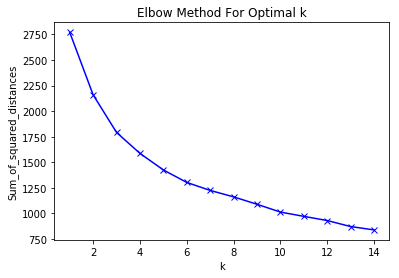

In [125]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Text(0.5,1,'Four clusters')

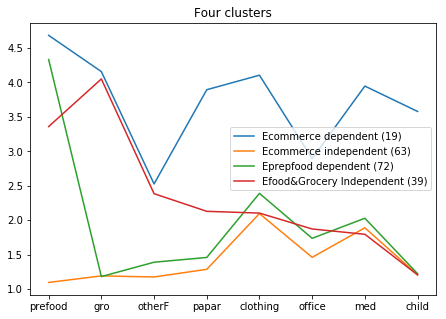

In [130]:
km4_ = KMeans(n_clusters=4, n_init = 25, max_iter = 1000, random_state = 0)
km4_ = km4_.fit(XE_)
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
x = ['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child']
labels = [ 'Ecommerce dependent (19)', 'Ecommerce independent (63)', 'Eprepfood dependent (72)','Efood&Grocery Independent (39)', ]
y = km4_.cluster_centers_
for y_arr, label in zip(y, labels):
    plt.plot(x, y_arr, label=label)
plt.legend()
plt.title('Four clusters')

In [128]:
display(np.unique(km4_.labels_, return_counts=True))

(array([0, 1, 2, 3], dtype=int32), array([19, 63, 72, 39]))

In [129]:
km4_.cluster_centers_

array([[4.68421053, 4.15789474, 2.52631579, 3.89473684, 4.10526316,
        2.89473684, 3.94736842, 3.57894737],
       [1.0952381 , 1.19047619, 1.17460317, 1.28571429, 2.0952381 ,
        1.46031746, 1.88888889, 1.20634921],
       [4.33333333, 1.18055556, 1.38888889, 1.45833333, 2.38888889,
        1.73611111, 2.02777778, 1.22222222],
       [3.35897436, 4.05128205, 2.38461538, 2.12820513, 2.1025641 ,
        1.87179487, 1.79487179, 1.20512821]])

Text(0.5,1,'Five clusters')

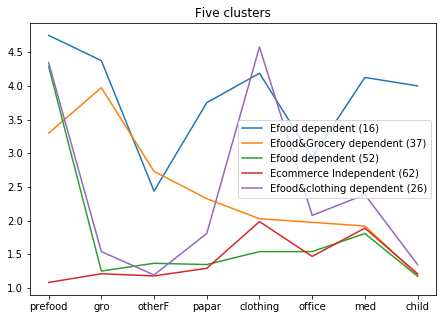

In [137]:
km5_ = KMeans(n_clusters=5, n_init = 25, max_iter = 1000, random_state = 0)
km5_ = km5_.fit(XE_)
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
x = ['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child']
labels = [ 'Efood dependent (16)', 'Efood&Grocery dependent (37)', 'Efood dependent (52)','Ecommerce Independent (62)', 'Efood&clothing dependent (26)']
y = km5_.cluster_centers_
for y_arr, label in zip(y, labels):
    plt.plot(x, y_arr, label=label)
plt.legend()
plt.title('Five clusters')

In [138]:
display(np.unique(km5_.labels_, return_counts=True))

(array([0, 1, 2, 3, 4], dtype=int32), array([16, 37, 52, 62, 26]))

In [139]:
km5_.cluster_centers_

array([[4.75      , 4.375     , 2.4375    , 3.75      , 4.1875    ,
        2.9375    , 4.125     , 4.        ],
       [3.2972973 , 3.97297297, 2.72972973, 2.32432432, 2.02702703,
        1.97297297, 1.91891892, 1.18918919],
       [4.28846154, 1.25      , 1.36538462, 1.34615385, 1.53846154,
        1.53846154, 1.80769231, 1.17307692],
       [1.08064516, 1.20967742, 1.17741935, 1.29032258, 1.98387097,
        1.46774194, 1.88709677, 1.20967742],
       [4.34615385, 1.53846154, 1.19230769, 1.80769231, 4.57692308,
        2.07692308, 2.38461538, 1.34615385]])

### 1.4 Substitution or Complement

In [66]:
list(sacog.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'Duration (in seconds)',
 'Response ID',
 'May-WorkingHours',
 'May-TelecommutingDays',
 'May-Trips-Commuting',
 'May-Trips-Medical',
 'May-Trips-Gym',
 'May-Trips-ToSchool',
 'May-Trips-FromSchool',
 'May-Trips-Bar',
 'May-Trips-MovieTheater',
 'May-Trips-Friends',
 'May-Trips-Family',
 'May-Trips-Other',
 'May-Trips-OtherType',
 'CommutingFollowup',
 'May-TripDistance-Commuting',
 'May-TripDistance-Medical',
 'May-TripDistance-Gym',
 'May-TripDistance-ToSchool',
 'May-TripDistance-FromSchool',
 'May-TripDistance-Bar',
 'May-TripDistance-MovieTheater',
 'May-TripDistance-Friends',
 'May-TripDistance-Family',
 'May-TripDistance-Other',
 'May-TripDistance-OtherType',
 'May-TripMode-Commuting',
 'May-TripMode-Medical',
 'May-TripMode-Gym',
 'May-TripMode-ToSchool',
 'May-TripMode-FromSchool',
 'May-TripMode-Bar',
 'May-TripMode-MovieTheater',
 'May-TripMode-Friends',
 'May-TripMode-Family',
 'May-TripMode-Other',
 'May-TripMode-OtherType',
 'LivingInSameP

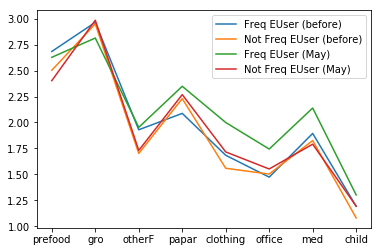

In [67]:
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], sacog[sacog['Before Group'].isin(['Freq EUser'])][['May_Freq_PreparedFood', 'May_Freq_Grocery', 'May_Freq_OtherFood', 'May_Freq_PaperCleaning', 
     'May_Freq_Clothing', 'May_Freq_HomeOffice', 'May_Freq_Medication', 'May_Freq_Childcare']].mean(axis = 0), label = 'Freq EUser (before)')
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], sacog[sacog['Before Group'].isin(['Not Freq EUser'])][['May_Freq_PreparedFood', 'May_Freq_Grocery', 'May_Freq_OtherFood', 'May_Freq_PaperCleaning', 
     'May_Freq_Clothing', 'May_Freq_HomeOffice', 'May_Freq_Medication', 'May_Freq_Childcare']].mean(axis = 0), label = 'Not Freq EUser (before)')
plt.legend()
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], sacog[sacog['May Group'].isin(['Freq EUser'])][['May_Freq_PreparedFood', 'May_Freq_Grocery', 'May_Freq_OtherFood', 'May_Freq_PaperCleaning', 
     'May_Freq_Clothing', 'May_Freq_HomeOffice', 'May_Freq_Medication', 'May_Freq_Childcare']].mean(axis = 0), label = 'Freq EUser (May)')
plt.plot(['prefood', 'gro', 'otherF', 'papar','clothing', 'office', 'med', 'child'], sacog[sacog['May Group'].isin(['Not Freq EUser'])][['May_Freq_PreparedFood', 'May_Freq_Grocery', 'May_Freq_OtherFood', 'May_Freq_PaperCleaning', 
     'May_Freq_Clothing', 'May_Freq_HomeOffice', 'May_Freq_Medication', 'May_Freq_Childcare']].mean(axis = 0), label = 'Not Freq EUser (May)')
plt.legend()

## next step: 
#### 1) compare in-store style for different Ecommerce group;
#### 2) group in-store style
#### 3) group shopping style (?) combine in-store & online shopping behavior
#### 4) Explore the transition of style (clear)